# Notebook for Exploratory Data Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

# Read in MacroEconomic Data
These are all manually downloaded from different sources, and all need unique handling. Thurs, each cell contains the preprocessing step for each data source
1. Purchasing Managers Index(Forward looking indicator): PMI Forecast Level/3 Month Change, PMI Surprise Momentum (Actual - Forecast), 3 month
1. Real Gross Domestic Product: GDP Two Quarter Growth 
1. Inflation Breakeven Rate (Forward looking expectations): Level, and Change in Expectations
1. Yield: 10 Year - 2 Year Yield (Forward looking indicator), Change in 10Y - 2Y Yield

In [2]:
backtest_dates = pd.DataFrame(pd.bdate_range("2009-01-01", "2023-02-10")).rename(columns={0:"date"})

In [3]:
PMI = pd.read_excel("../data/macroeconomic/PMI.xlsx")
PMI["date"] = PMI["Release Date"].apply(lambda x:x[:12])
PMI["date"] = pd.to_datetime(PMI["date"], format="%b %d, %Y")
PMI.sort_values("date", inplace=True)
PMI["PMI_Surprise"] = PMI["Actual"] - PMI["Forecast"]
PMI["PMI_Actual"] = PMI["Actual"]
PMI["PMI_1Q_Forecast"] = PMI["Forecast"].shift(1)
PMI["PMI_Surprise_Mom"] = PMI["PMI_Surprise"].rolling(3).sum()
PMI["PMI_1Q_Forecast_Change"] = PMI["PMI_1Q_Forecast"].diff().rolling(3).sum()
PMI = backtest_dates.merge(PMI, how="left")
PMI = PMI.ffill().dropna()
PMI["date"] = pd.to_datetime(PMI["date"]) + BDay(1)
PMI_final = PMI[["date", "PMI_Surprise_Mom", "PMI_1Q_Forecast_Change"]].copy()
PMI_final.tail()

,date,PMI_Surprise_Mom,PMI_1Q_Forecast_Change
3677,2023-02-07,-5.6,-11.8
3678,2023-02-08,-5.6,-11.8
3679,2023-02-09,-5.6,-11.8
3680,2023-02-10,-5.6,-11.8
3681,2023-02-13,-5.6,-11.8


In [4]:
REAL_GDP = pd.read_csv("../data/macroeconomic/REAL_GDP.csv")
REAL_GDP.DATE = pd.to_datetime(REAL_GDP.DATE, format="%Y-%m-%d")
REAL_GDP.columns = ["date", "Real_GDP_Level"]
REAL_GDP["GDP_Growth_2Q"] = REAL_GDP.Real_GDP_Level.pct_change().rolling(2).sum()
REAL_GDP = backtest_dates.merge(REAL_GDP, how="left")
REAL_GDP["date"] = pd.to_datetime(REAL_GDP["date"])  + BDay(63) # Three months lag
REAL_GDP = REAL_GDP.ffill()
REAL_GDP.GDP_Growth_2Q = REAL_GDP.GDP_Growth_2Q * 100
REAL_GDP_final = REAL_GDP[["date", "GDP_Growth_2Q"]].copy()
REAL_GDP_final.tail()

,date,GDP_Growth_2Q
3677,2023-05-04,0.656521
3678,2023-05-05,0.656521
3679,2023-05-08,0.656521
3680,2023-05-09,0.656521
3681,2023-05-10,0.656521


In [5]:
T10Y_Inflation_Breakeven = pd.read_csv("../data/macroeconomic/T10Y_Inflation_Breakeven.csv")
T10Y_Inflation_Breakeven.DATE = pd.to_datetime(T10Y_Inflation_Breakeven.DATE, format="%Y-%m-%d")
T10Y_Inflation_Breakeven.columns = ["date", "Inflation_Breakeven_Level"]
T10Y_Inflation_Breakeven = backtest_dates.merge(T10Y_Inflation_Breakeven, how="left")
T10Y_Inflation_Breakeven = T10Y_Inflation_Breakeven.bfill(limit=54)
T10Y_Inflation_Breakeven.Inflation_Breakeven_Level = T10Y_Inflation_Breakeven.Inflation_Breakeven_Level.replace(".", np.nan)
T10Y_Inflation_Breakeven.Inflation_Breakeven_Level = T10Y_Inflation_Breakeven.Inflation_Breakeven_Level.ffill()
T10Y_Inflation_Breakeven.date = T10Y_Inflation_Breakeven.date  + BDay(1)
T10Y_Inflation_Breakeven["Inflation_Breakeven_Level"] = T10Y_Inflation_Breakeven["Inflation_Breakeven_Level"].astype(float)
T10Y_Inflation_Breakeven["Inflation_Breakeven_1M_Change"] = T10Y_Inflation_Breakeven["Inflation_Breakeven_Level"] - T10Y_Inflation_Breakeven["Inflation_Breakeven_Level"].shift(21)
T10Y_Inflation_Breakeven_final = T10Y_Inflation_Breakeven.dropna()
T10Y_Inflation_Breakeven_final.tail()

,date,Inflation_Breakeven_Level,Inflation_Breakeven_1M_Change
3677,2023-02-07,2.25,0.04
3678,2023-02-08,2.31,0.09
3679,2023-02-09,2.34,0.10
3680,2023-02-10,2.33,0.10
3681,2023-02-13,2.33,0.12


In [6]:
T10Y_minus_2Y = pd.read_csv("../data/macroeconomic/T10Y_minus_2Y.csv")
T10Y_minus_2Y.DATE = pd.to_datetime(T10Y_minus_2Y.DATE, format="%Y-%m-%d")
T10Y_minus_2Y.columns = ["date", "T10Y_minus_2Y"]
T10Y_minus_2Y.date = T10Y_minus_2Y.date  + BDay(1)
T10Y_minus_2Y = backtest_dates.merge(T10Y_minus_2Y, how="left")
T10Y_minus_2Y.T10Y_minus_2Y = T10Y_minus_2Y.T10Y_minus_2Y.replace(".", np.nan)
T10Y_minus_2Y.T10Y_minus_2Y = T10Y_minus_2Y.T10Y_minus_2Y.ffill()
T10Y_minus_2Y.T10Y_minus_2Y = T10Y_minus_2Y.T10Y_minus_2Y.astype(float)
T10Y_minus_2Y["T10Y_minus_2Y_1M_Change"] = T10Y_minus_2Y.T10Y_minus_2Y - T10Y_minus_2Y.T10Y_minus_2Y.shift(21)
T10Y_minus_2Y.tail()

,date,T10Y_minus_2Y,T10Y_minus_2Y_1M_Change
3677,2023-02-06,-0.77,-0.03
3678,2023-02-07,-0.81,-0.12
3679,2023-02-08,-0.80,-0.14
3680,2023-02-09,-0.82,-0.19
3681,2023-02-10,-0.81,-0.15


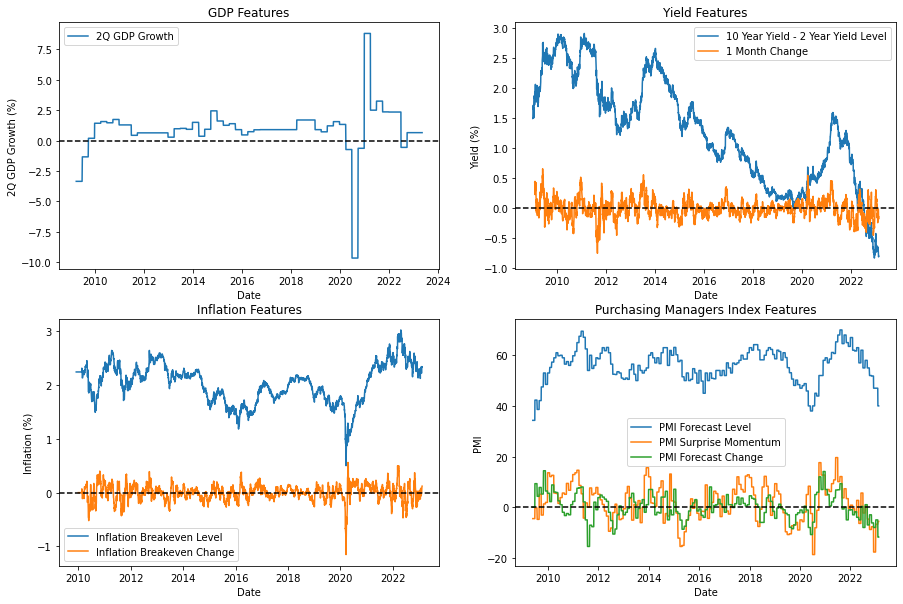

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0,0].plot(REAL_GDP.set_index("date").GDP_Growth_2Q, label = "2Q GDP Growth")
axs[0,0].set_title("GDP Features")
axs[0,0].set_xlabel("Date")
axs[0,0].set_ylabel("2Q GDP Growth (%)")
axs[0,0].axhline(0, ls="--", color="black")
axs[0,0].legend()

axs[0,1].plot(T10Y_minus_2Y.set_index("date").T10Y_minus_2Y, label="10 Year Yield - 2 Year Yield Level")
axs[0,1].plot(T10Y_minus_2Y.set_index("date").T10Y_minus_2Y_1M_Change, label="1 Month Change")
axs[0,1].set_title("Yield Features")
axs[0,1].set_xlabel("Date")
axs[0,1].legend()
axs[0,1].set_ylabel("Yield (%)")
axs[0,1].axhline(0, ls="--", color="black")

axs[1,0].plot(T10Y_Inflation_Breakeven.set_index("date").Inflation_Breakeven_Level, label = "Inflation Breakeven Level")
axs[1,0].plot(T10Y_Inflation_Breakeven.set_index("date").Inflation_Breakeven_1M_Change, label = "Inflation Breakeven Change")
axs[1,0].set_title("Inflation Features")
axs[1,0].set_xlabel("Date")
axs[1,0].set_ylabel("Inflation (%)")
axs[1,0].legend()
axs[1,0].axhline(0, ls="--", color="black")

axs[1,1].plot(PMI.set_index("date")[["PMI_1Q_Forecast"]], label="PMI Forecast Level")
axs[1,1].plot(PMI.set_index("date")[["PMI_Surprise_Mom"]], label="PMI Surprise Momentum")
axs[1,1].plot(PMI.set_index("date")[["PMI_1Q_Forecast_Change"]], label = "PMI Forecast Change")
axs[1,1].set_title("Purchasing Managers Index Features")
axs[1,1].set_xlabel("Date")
axs[1,1].set_ylabel("PMI")
axs[1,1].legend()
axs[1,1].axhline(0, ls="--", color="black")

# Textual Features

In [8]:
nyt_sentiment_chatgpt_final = pd.read_csv("../data/nlp_processed/nyt_sentiment_chatgpt_final.csv")
nyt_sentiment_chatgpt_final = nyt_sentiment_chatgpt_final.rename(columns={"pub_date":"date"}).drop(columns="main_headline")
nyt_sentiment_chatgpt_final["date"] = pd.to_datetime(nyt_sentiment_chatgpt_final["date"])

Text(0, 0.5, 'Count')

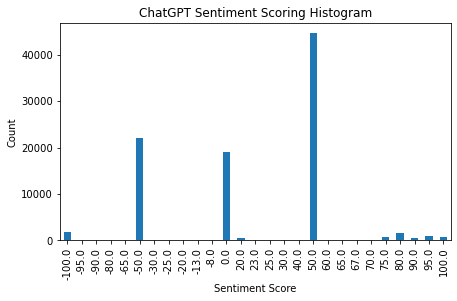

In [9]:
plt.figure(figsize=(7, 4))
nyt_sentiment_chatgpt_final.ChatGPT_sentiment.value_counts().sort_index().plot(kind="bar")
plt.title("ChatGPT Sentiment Scoring Histogram")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")

In [10]:
subset = nyt_sentiment_chatgpt_final.sample(10000).copy()

Text(0, 0.5, 'Count')

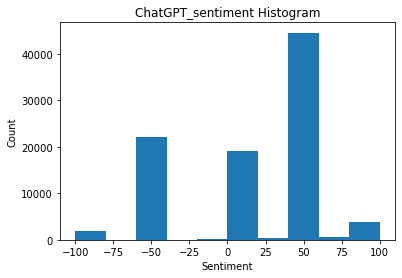

In [11]:
plt.hist(nyt_sentiment_chatgpt_final.ChatGPT_sentiment)
plt.title("ChatGPT_sentiment Histogram")
plt.xlabel("Sentiment")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

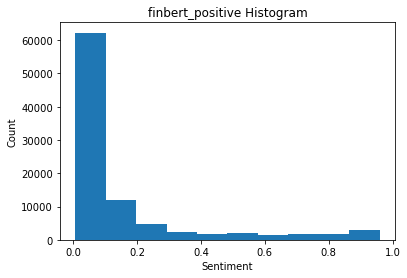

In [12]:
plt.hist(nyt_sentiment_chatgpt_final.finbert_positive)
plt.title("finbert_positive Histogram")
plt.xlabel("Sentiment")
plt.ylabel("Count")

Text(0.5, 1.0, 'Kernel Density Estimate of FinBERT vs ChatGPT')

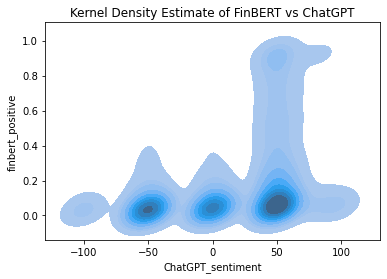

In [13]:
import seaborn as sns
sns.kdeplot(
    data=subset, x="ChatGPT_sentiment", y="finbert_positive", fill=True,
)
plt.title("Kernel Density Estimate of FinBERT vs ChatGPT")

Text(0, 0.5, 'finbert_positive')

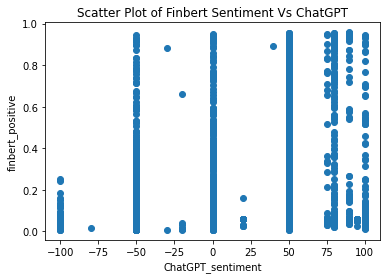

In [14]:
plt.scatter(subset.ChatGPT_sentiment, subset.finbert_positive)
plt.title("Scatter Plot of Finbert Sentiment Vs ChatGPT")
plt.xlabel("ChatGPT_sentiment")
plt.ylabel("finbert_positive")

# Get Correlation

In [15]:
from pandas.tseries.offsets import BDay

<AxesSubplot:>

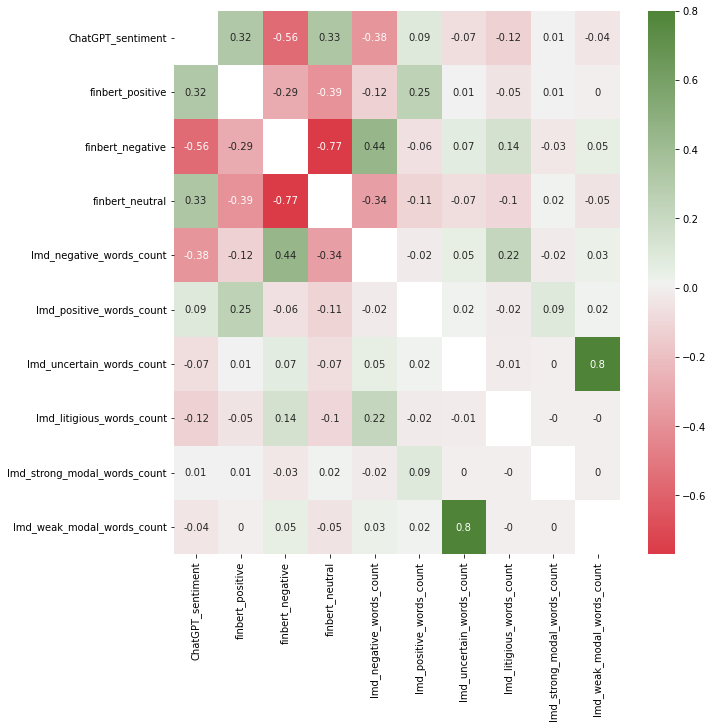

In [16]:
plt.figure(figsize=(10,10))
heatmap_df = round(nyt_sentiment_chatgpt_final.drop(columns=["ticker", "date", "word_count"]).corr(), 2)
for i in range(len(heatmap_df)):
    heatmap_df.iloc[i,i] = np.nan
sns.heatmap(heatmap_df, 
            annot=True, cmap=sns.diverging_palette(10, 120, as_cmap=True))